In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt((10 ** 2) - (x ** 2))
y = np.hstack([y, -y])
x = np.hstack([x, -x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt((5 ** 2) - (x1 ** 2))
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

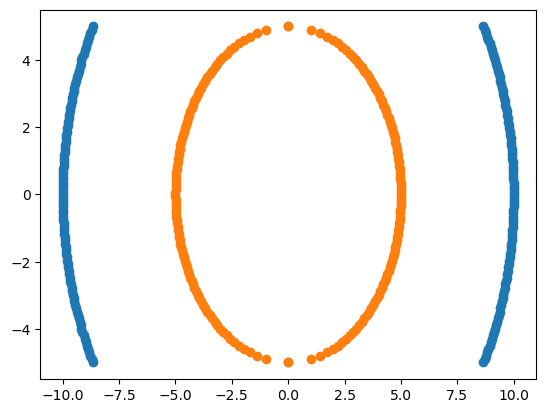

In [2]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [14]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns = ['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2])
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


# Polynomial Kernel

In [16]:
df['X1_Square'] = df['X1'] ** 2
df['X2_Square'] = df['X2'] ** 2
df['X1 * X2'] = df['X1'] * df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1 * X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


#### Independent and dependent features

In [18]:
X = df[['X1_Square', 'X2_Square', 'X1 * X2']]
y = df['Y']

In [19]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 0)

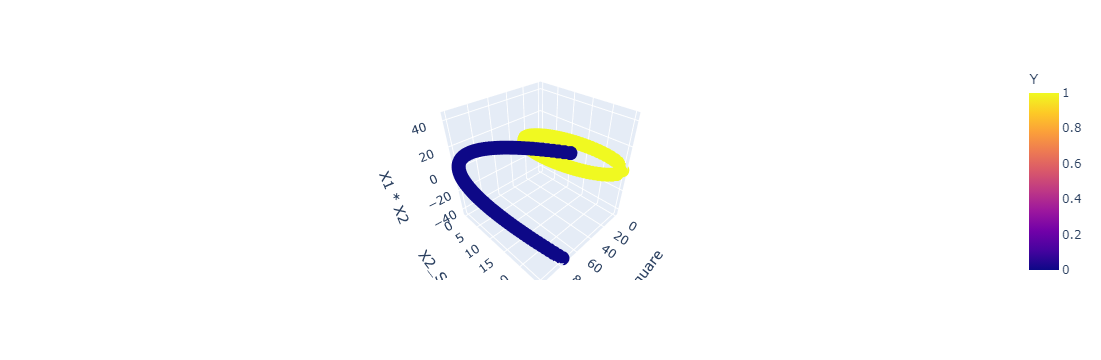

In [25]:
import plotly.express as px

fig = px.scatter_3d(df, x = 'X1_Square', y = 'X2_Square', z = 'X1 * X2', color = 'Y')
fig.show()

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
print("Coefficient or Slope:", svc.coef_)

Coefficient or Slope: [[-3.20033358e-02 -1.59992191e-02 -4.31881263e-06]]


In [27]:
from sklearn.metrics import accuracy_score

y_test_prediction = svc.predict(X_test)
print(accuracy_score(y_test, y_test_prediction))

1.0


# RBF (Radial Basis Function) Kernel

#### Independent and dependent features

In [29]:
X = df[['X1', 'X2']]
y = df['Y']

In [35]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 0)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
y_test_prediction = svc.predict(X_test)
print(accuracy_score(y_test, y_test_prediction))

1.0


# Sigmoid Kernel

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
y_test_prediction = svc.predict(X_test)
print(accuracy_score(y_test, y_test_prediction))

0.51
